In [2]:
# import the libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [4]:
# Look at the data types of the variabels
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
# Get the shape of the arrays
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [7]:
# Take a look at the first image as an array
index = 0 
x_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

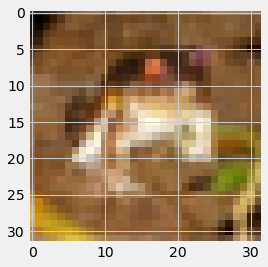

In [8]:
# Show the image as pic
img = plt.imshow(x_train[index])

In [9]:
# Get the iamge label
print('the image label is :', y_train[index])

the image label is : [6]


In [13]:
# Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#print the image class
print('image class is :' ,classification[y_train[index][0]])

image class is : frog


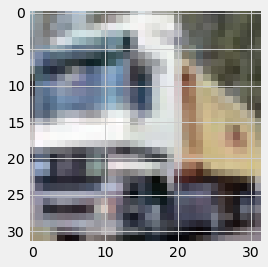

In [14]:
img = plt.imshow(x_train[1])

In [16]:
print('image class is :' ,classification[y_train[1][0]])

image class is : truck


In [17]:
# Convert the labels into a set of 10 numbers to put into neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [18]:
# Print the new lables
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [19]:
# Print the new label of the current iamge 
print('The one hot label is :', y_train_one_hot[index])

The one hot label is : [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [20]:
# Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [23]:
x_train[index]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [24]:
# Create the models architecture
model = Sequential()

# Add the first layer (convolution layer)
model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )

# Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add another convolution layer
model.add( Conv2D(32, (5,5), activation='relu') )

# Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a flattening layer
model.add(Flatten())

# Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

# Add a drop out layer
model.add(Dropout(0.5))

# Add another layer with 500 neurons
model.add(Dense(500, activation='relu'))

# Add a drop out layer
model.add(Dropout(0.5))

# Add another layer with 250 neurons
model.add(Dense(250, activation='relu'))

# Add another layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [25]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer= 'adam',
              metrics = ['accuracy'])

In [26]:
# Train the model 
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 57s 356ms/step - loss: 1.9923 - accuracy: 0.2469 - val_loss: 1.5243 - val_accuracy: 0.4425
Epoch 2/10
157/157 [==============================] - 55s 352ms/step - loss: 1.4378 - accuracy: 0.4693 - val_loss: 1.2530 - val_accuracy: 0.5547
Epoch 3/10
157/157 [==============================] - 55s 353ms/step - loss: 1.2609 - accuracy: 0.5454 - val_loss: 1.1623 - val_accuracy: 0.5891
Epoch 4/10
157/157 [==============================] - 55s 354ms/step - loss: 1.1432 - accuracy: 0.5908 - val_loss: 1.1215 - val_accuracy: 0.5984
Epoch 5/10
157/157 [==============================] - 55s 354ms/step - loss: 1.0583 - accuracy: 0.6275 - val_loss: 1.0517 - val_accuracy: 0.6253
Epoch 6/10
157/157 [==============================] - 55s 353ms/step - loss: 0.9886 - accuracy: 0.6496 - val_loss: 0.9653 - val_accuracy: 0.6617
Epoch 7/10
157/157 [==============================] - 55s 349ms/step - loss: 0.9139 - accuracy: 0.6732 - val_loss: 0.9463 - val_ac

In [27]:
# Evaluate the model using the test data set 
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 16ms/step - loss: 0.9354 - accuracy: 0.6794


0.6794000267982483

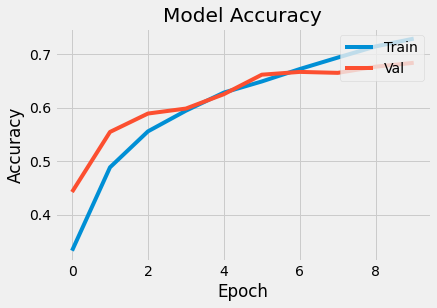

In [33]:
# Visualize the models accuracy 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

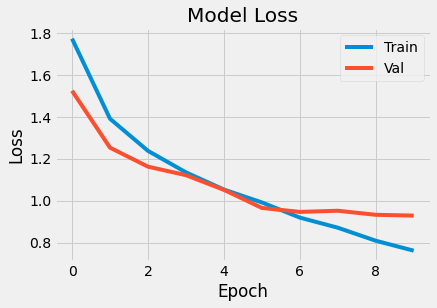

In [34]:
# Visualize the models loss 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [74]:
# Test the model with an example
from google.colab import files
uploaded = files.upload()

Saving h4.jpg to h4.jpg


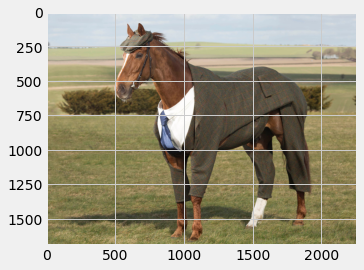

In [75]:
# show the uploaded image
new_image = plt.imread('h4.jpg')
img = plt.imshow(new_image)

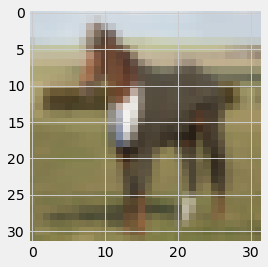

In [76]:
# Resize the image to be (32, 32, 3)
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [77]:
# Get the models predictions
predictions = model.predict(np.array([resized_image]))
#show the predictions
predictions

array([[3.4418870e-03, 2.0157413e-04, 2.6701530e-02, 5.9973611e-03,
        1.0200556e-01, 2.1711761e-02, 6.1342143e-04, 8.3652973e-01,
        2.4594666e-04, 2.5513005e-03]], dtype=float32)

In [78]:
# Sort the prediction from least to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[7, 4, 2, 5, 3, 0, 9, 6, 8, 1]


In [79]:
# Print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

horse : 83.65 %
deer : 10.2 %
bird : 2.67 %
dog : 2.17 %
cat : 0.6 %
